In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Lab-Classification-Handling-Imbalanced-Data

Round 1
- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `churnData`.
- Check the datatypes of all the columns in the data. You will see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  - Split the data into a training set and a test set.
  - Scale the features either by using normalizer or a standard scaler.
  - (optional)Fit a logistic Regression model on the training data.
  - Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [2]:
url = 'DATA_Customer-Churn.csv'
df = pd.read_csv(url)

In [3]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [5]:
def null_check(data_frame):
    print(f'Total null values per row: \n{data_frame.isnull().sum(axis=1)}\n')
    print(f'Total null values per column: \n{data_frame.isnull().sum()}\n')

In [6]:
null_check(df)

Total null values per row: 
0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Length: 7043, dtype: int64

Total null values per column: 
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64



In [7]:
# For rows with NaN in TotalCharges, calculate or replace based on the strategy

df.loc[(df['TotalCharges'].isna()) & (df['tenure'] > 1), 'TotalCharges'] = df['MonthlyCharges'] * df['tenure']
df.loc[(df['TotalCharges'].isna()) & (df['tenure'] <= 1), 'TotalCharges'] = df['MonthlyCharges']

In [8]:
df.loc[df['Churn'] == 'Yes', 'churn'] = 1
df.loc[df['Churn'] == 'No', 'churn'] = 0

In [9]:
df_filtered = df[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'churn']]

In [10]:
df_filtered

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,churn
0,1,0,29.85,29.85,0.0
1,34,0,56.95,1889.50,0.0
2,2,0,53.85,108.15,1.0
3,45,0,42.30,1840.75,0.0
4,2,0,70.70,151.65,1.0
...,...,...,...,...,...
7038,24,0,84.80,1990.50,0.0
7039,72,0,103.20,7362.90,0.0
7040,11,0,29.60,346.45,0.0
7041,4,1,74.40,306.60,1.0


### Data splitting

In [11]:
y = df_filtered['churn']  
X = df_filtered.drop(columns=['churn']) 

print(X.shape)
print(y.shape)

# If 'y' is categorical and you want to see the unique classes
unique_classes = np.unique(y)
print(unique_classes)

(7043, 4)
(7043,)
[0. 1.]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [13]:
pt = PowerTransformer()
pt.fit(X_train)
X_train_log = pt.transform(X_train)
X_test_log = pt.transform(X_test)

In [14]:
log_model = LogisticRegression() 

log_model.fit(X_train_log, y_train)

y_pred_train_log = log_model.predict(X_train_log)
y_pred_test_log = log_model.predict(X_test_log)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.787895,0.799148
1,Precision,0.651951,0.693878
2,Recall,0.425889,0.449735


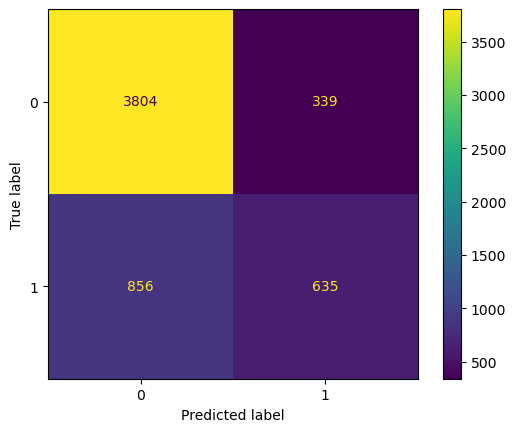

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train, y_pred_train_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

In [20]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test.values) # predict test
y_pred_train=model.predict(X_train.values) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

C:\Users\vonke\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\vonke\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


,Error_metric,Train,Test
0,Accuracy,0.834043,0.770759
1,Precision,0.744718,0.602996
2,Recall,0.567404,0.425926


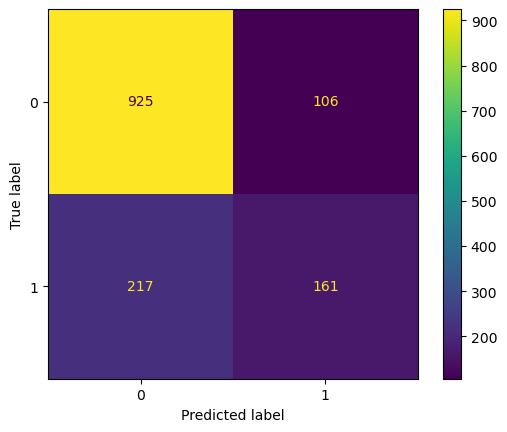

In [22]:
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=50):
    """
    Iterate over a range of n_neighbors to find the best one based on test accuracy.
    
    Parameters:
    - X_train, y_train: Training features and target
    - X_test, y_test: Test features and target
    - min_k: Minimum number of neighbors to try
    - max_k: Maximum number of neighbors to try
    
    Returns:
    - A DataFrame with k, training accuracy, and test accuracy
    """
    results = []

    for k in range(min_k, max_k + 1):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        # Predictions
        y_pred_train = knn.predict(X_train)
        y_pred_test = knn.predict(X_test)
        
        # Calculate accuracies
        train_accuracy = accuracy_score(y_train, y_pred_train)
        test_accuracy = accuracy_score(y_test, y_pred_test)
        
        # Append to results
        results.append({'k': k, 'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy})
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    
    return results_df

# Example usage:
# Adjust min_k and max_k based on your specific needs and computational budget
best_k_df = find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=20)

# Display the results
print(best_k_df)

# Identify the value of k with the highest test accuracy
best_k = best_k_df.loc[best_k_df['test_accuracy'].idxmax()]
print(f"Best k: {best_k['k']} with Test Accuracy: {best_k['test_accuracy']}")
